In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import preproc as prp

Using TensorFlow backend.


In [17]:
prp??

# Input image

In [3]:
gref1 = cv2.imread('gref_test.png')
ya = cv2.imread('data.jpg')
gref2 = cv2.imread('gref2.jpg')
gref3 = cv2.imread('gref3.jpg')
puten = cv2.imread('puten.jpg')
putin2 = cv2.imread('putin2.jpg')
ya2 = cv2.imread('ya.JPG')
medv = cv2.imread('medv.jpg')
ebn = cv2.imread('ebn.jpeg')
ebn2 = cv2.imread('ebn2.jpg')
medv2 = cv2.imread('medv1.jpg')

nabiu1 = cv2.imread('nabiu.jpg')
nabiu2 = cv2.imread('nabiu2.jpg')

In [6]:
prp.face_distance(nabiu1,nabiu2)

86.954216

In [8]:
embedded = [prp.face_embedding(ebn),prp.face_embedding(ya2),prp.face_embedding(ebn2)]
faces = [ebn,ya2,ebn2]
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {prp.distance(embedded[idx1], embedded[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(faces[idx1])
    plt.subplot(122)
    plt.imshow(faces[idx2])

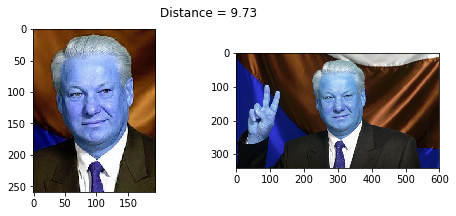

In [10]:
show_pair(0,2)

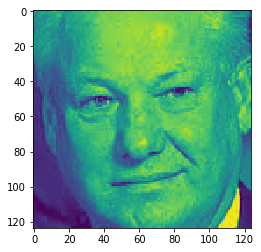

In [19]:
plt.imshow(prp.crop_faces(ebn)[0])

# Accuracy

In [11]:
metadata = ['gref','nabiu','gref','ebn','ebn','medv','medv','gref','nabiu']

In [13]:
embedded = [prp.face_embedding(gref1),prp.face_embedding(nabiu1),prp.face_embedding(gref3),prp.face_embedding(ebn),prp.face_embedding(ebn2),prp.face_embedding(medv),prp.face_embedding(medv2),prp.face_embedding(gref2),prp.face_embedding(nabiu2)]

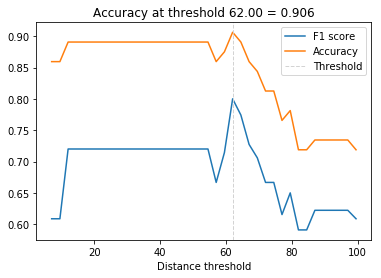

In [15]:
from sklearn.metrics import f1_score, accuracy_score

distances = [] 
identical = [] 

num = len(metadata)

for i in range(num - 1):
    for j in range(1, num):
        distances.append(prp.distance(embedded[i], embedded[j]))
        identical.append(1 if metadata[i] == metadata[j] else 0)

        
distances = np.array(distances)
identical = np.array(identical)

thresholds = np.arange(7, 100, 2.5)

f1_scores = [f1_score(identical, distances < t) for t in thresholds]
acc_scores = [accuracy_score(identical, distances < t) for t in thresholds]

opt_idx = np.argmax(f1_scores)

opt_tau = thresholds[opt_idx]

opt_acc = accuracy_score(identical, distances < opt_tau)

plt.plot(thresholds, f1_scores, label='F1 score');
plt.plot(thresholds, acc_scores, label='Accuracy');
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title(f'Accuracy at threshold {opt_tau:.2f} = {opt_acc:.3f}');
plt.xlabel('Distance threshold')
plt.legend();